# Surfs Up!
Congratulations! You've decided to treat yourself to a long holiday vacation in Honolulu, Hawaii! 
To help with your trip planning, you need to do some climate analysis on the area. 
The following outlines what you need to do.

## Step 1 - Climate Analysis and Exploration

To begin, use Python and SQLAlchemy to do basic climate analysis and data exploration of your climate database. 
All of the following analysis should be completed using SQLAlchemy ORM queries, Pandas, and Matplotlib.


Use the provided starter notebook and hawaii.sqlite files to complete your climate analysis and data exploration.
Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.
Use SQLAlchemy create_engine to connect to your sqlite database.
Use SQLAlchemy automap_base() to reflect your tables into classes and save a reference to those classes 
called Station and Measurement.

## Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.

###### I choose 4/09/2018 - 04/15/2018

In [23]:
my_start='2018-04-09'
my_end='2018-04-15'

In [24]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [25]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, distinct, extract

In [26]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [27]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [28]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [29]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [30]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [31]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
columns = inspector.get_columns('station')
for p in columns:
    print(p['name'], p["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

### Precipitation Analysis


Design a query to retrieve the last 12 months of precipitation data.
Select only the date and prcp values.
Load the query results into a Pandas DataFrame and set the index to the date column.
Sort the DataFrame values by date.
Plot the results using the DataFrame plot method.

In [32]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database

ed_date = session.query(func.max(Measurement.date)).all()
end_date = ed_date[0][0]

# Perform a query to retrieve the data and precipitation scores
start = dt.datetime.strftime(dt.datetime.strptime(end_date, '%Y-%m-%d') - dt.timedelta(days=365), '%Y-%m-%d')
last12 = session.query(Measurement.date,Measurement.prcp).\
        filter(Measurement.date > start).order_by(Measurement.date).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df=pd.DataFrame(last12)
prcp_df.set_index('date').head()

# Sort the dataframe by date
prcp_df = prcp_df.sort_values(by=['date'])
prcp_df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


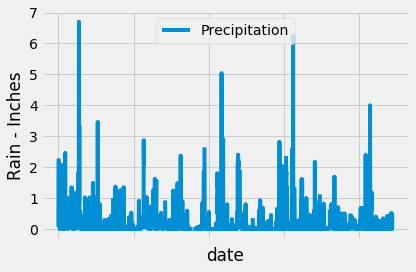

In [33]:
# Use Pandas Plotting with Matplotlib to plot the data

prcp_df.plot('date', 'prcp')
plt.xlabel("date")
plt.ylabel("Rain - Inches")
plt.legend(["Precipitation"],loc=9)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [34]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


##### Station Analysis

Design a query to calculate the total number of stations.
Design a query to find the most active stations.

List the stations and observation counts in descending order.
Which station has the highest number of observations?
Hint: You may need to use functions such as func.min, func.max, func.avg, and func.count in your queries.


Design a query to retrieve the last 12 months of temperature observation data (tobs).

Filter by the station with the highest number of observations.
Plot the results as a histogram with bins=12.

In [35]:
# Design a query to show how many stations are available in this dataset?
sts= session.query(func.count(distinct(Measurement.station))).all()
stations = sts[0][0]
print(f"There are {stations} stations.")

There are 9 stations.


In [36]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active = session.query(Measurement.station,func.count(Measurement.tobs).label('count')).\
        group_by(Measurement.station).order_by('count DESC').all()

active

C:\Users\silva\Anaconda\Anaconda3\lib\site-packages\sqlalchemy\sql\compiler.py:643: SAWarning: Can't resolve label reference 'count DESC'; converting to text() (this warning may be suppressed after 10 occurrences)
  util.ellipses_string(element.element))


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

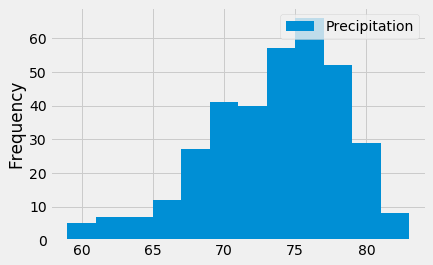

In [37]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active =  active[0][0]

last12ma = session.query(Measurement.date,Measurement.tobs).\
        filter(Measurement.date > start).filter(Measurement.station==most_active).order_by(Measurement.date).all()
tobs_df=pd.DataFrame(last12ma)
tobs_df.set_index('date')
hist = tobs_df.hist(bins=12)
plt.ylabel("Frequency")
plt.title('')
plt.legend(["Precipitation"],loc=1)
plt.show()

In [38]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
most_active = active[0][0]    
cal_mst= session.query(Measurement.station, func.min(Measurement.tobs).label('LowTemp'),\
                       func.max(Measurement.tobs).label('HiTemp'),\
                       func.avg(Measurement.tobs).label('AvgTemp')).\
                       filter(Measurement.station==most_active).all()
cal_mst

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [39]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.   
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d        
    Returns:
        TMIN, TAVE, and TMAX
    """
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).\
        filter(Measurement.date >= start_date).\
        filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [40]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
py_start = (dt.datetime.strptime(my_start, '%Y-%m-%d')-dt.timedelta(days=365))
py_end = (dt.datetime.strptime(my_end, '%Y-%m-%d')-dt.timedelta(days=365))

lst_year = (calc_temps(py_start,py_end))
print(lst_year)

[(67.0, 74.38461538461539, 82.0)]


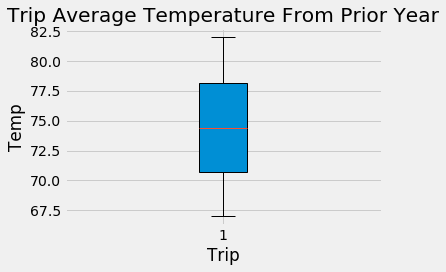

In [41]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
fig, ax = plt.subplots()
x = range(len(lst_year))
ax.boxplot(lst_year, patch_artist=True)
ax.set_title('Trip Average Temperature From Prior Year')
ax.set_ylabel("Temp")
ax.set_xlabel("Trip")
fig.tight_layout()
plt.show()

In [42]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, 
#and elevation

date_start = dt.datetime.strftime(py_start, '%Y-%m-%d')
date_end = dt.datetime.strftime(py_end, '%Y-%m-%d')

sel = [Station.station, 
       Station.name, 
       Station.latitude, 
       Station.longitude, 
       Station.elevation, 
       func.sum(Measurement.prcp)]
result = session.query(*sel).\
    filter(Measurement.station == Station.station).\
    filter(Measurement.date >= date_start).\
    filter(Measurement.date <= date_end).\
    group_by(Station.name).order_by(func.sum(Measurement.prcp).desc()).all()
print (result)

[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 4.8500000000000005), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 3.42), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 1.48), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.74), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.36), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.27), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, None)]


![precipitation](Images/station-histogram.png)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with stat


SystemExit: 1

C:\Users\silva\Anaconda\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3275: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


## Optional Challenge Assignment

In [46]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.    
    Args:
        date (str): A date string in the format '%m-%d'      
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """    
    sel = [func.strftime("%m-%d",Measurement.date).label('date'),func.min(Measurement.tobs).label('Min'), func.avg(Measurement.tobs).label('Avg'), func.max(Measurement.tobs).label('Max')]
    results = session.query(*sel).group_by(func.strftime("%m-%d",Measurement.date)).filter(func.strftime("%m-%d",Measurement.date) == date).\
        all()
    results = results[0]
    
    print(results)
   
daily_normals("01-01")

('01-01', 62.0, 69.15384615384616, 77.0)


In [47]:
tripdates =[]
date_1=dt.datetime.strptime(my_start, '%Y-%m-%d')
date_2=dt.datetime.strptime(my_end, '%Y-%m-%d')
for n in range(int((date_2 - date_1).days)+1):
        dtl = (dt.datetime.strftime(date_1 + dt.timedelta(n),"%m-%d"))
        tripdates.append(dtl)
print(tripdates)

# for i in (dt.datetime.strptime(my_start, '%Y-%m-%d')) to (dt.datetime.strptime(my_end, '%Y-%m-%d'))
#     date_trp=(str(func.extract('day', i))).zfill(2)+'-'+(str(func.extract('month', i))).zfill(2)
#     tripdates=tripdates.append.date_trp 

# print(tripdates)

['04-09', '04-10', '04-11', '04-12', '04-13', '04-14', '04-15']


In [48]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date

normals=[]
pDAT=[]
pMAX=[]
pMIN=[]
pAVG=[]
dates = tripdates
for date in dates:   
    
    MAX = session.query(func.max(Measurement.tobs).label('Max')).group_by(func.strftime("%m-%d",Measurement.date)).filter(func.strftime("%m-%d",Measurement.date) == date).\
        all()
    MIN = session.query(func.min(Measurement.tobs).label('Min')).group_by(func.strftime("%m-%d",Measurement.date)).filter(func.strftime("%m-%d",Measurement.date) == date).\
        all()
    AVG = session.query(func.avg(Measurement.tobs).label('Avg')).group_by(func.strftime("%m-%d",Measurement.date)).filter(func.strftime("%m-%d",Measurement.date) == date).\
        all()
    DAT = session.query(func.strftime("%m-%d",Measurement.date).label('date')).group_by(func.strftime("%m-%d",Measurement.date)).filter(func.strftime("%m-%d",Measurement.date) == date).\
        all()
    normals=[pDAT,pMAX, pMIN, pAVG]
    
    pDAT.append(DAT[0][0])
    pMAX.append(MAX[0][0])
    pMIN.append(MIN[0][0])
    pAVG.append(AVG[0][0])
df_normals=pd.DataFrame(normals).transpose()
df_normals=df_normals.rename(index=str, columns={0:"Date", 1:"Max", 2:"Min",3:"Avg"})
df_normals=df_normals.set_index('Date')
    
df_normals
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
# Daily normals

,Max,Min,Avg
Date,,,
04-09,78,62,71.614
04-10,79,64,71.4035
04-11,82,65,72.4918
04-12,80,65,72.2241
04-13,79,64,71.5254
04-14,81,65,72.75
04-15,79,61,71.7931


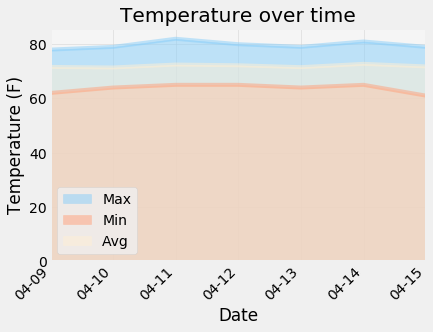

In [49]:
# Plot the daily normals as an area plot with `stacked=False`
# Plot
df_normals.plot.area(stacked=False, color=["lightskyblue", "lightsalmon", "papayawhip"])

ax = plt.gca()
ax.set_facecolor("whitesmoke")

# Format x-tick label
locs = ax.xaxis.get_ticklocs()[1:-1]
plt.xticks(locs, df_normals.index, rotation=45, ha="right")

# Other formatting
plt.xlim((locs[0], locs[-1]))
plt.xlabel("Date")
plt.ylabel("Temperature (F)")
plt.title("Temperature over time")
plt.grid(linestyle='-', linewidth='0.5', color='lightgrey')
ax.set_axisbelow(True)
